In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import matplotlib
from matplotlib import patheffects

import seaborn as sns

_30k_main_palette_dict = {
    "blue": "#202F66",
    "orange": "#FF7048",
    "purple": "#8B87EA",
    "pink": "#D869AB",
    "cyan": "#54C9B9",
    "yellow": "#F3D36E",
}

_30k_danger_safe_palette_dict = {
    "danger": "#FF4F72",
    "safe": "#58EDB9",
}

_30k_text_palette_dict = {
    "text_black": "#32363A",
    "text_lighter1": "#6F7273",
    "text_lighter2": "#8B8E8F",
    "bg_cream": "#FAF7F4"
}

_font_mono = "Inconsolata"
_font_serif = "Canela Text"
_font_sans = "Gill Sans"

plt.style.use("./utils/-30k.mplstyle")

_30k = list(_30k_main_palette_dict.values())
sns.set_palette(_30k)
# ← → ↓ ↑


import warnings
warnings.filterwarnings('ignore')

In [2]:
def plot_text_outlined(x, y, s, path_width=2.0, path_color="white", path_alpha=0.9, **kwargs):
    return plt.text(x=x, y=y, s=s,
                     path_effects=[
                         patheffects.Stroke(linewidth=path_width, foreground=path_color, alpha=path_alpha),
                         patheffects.Normal()], **kwargs)

In [3]:
df = pd.read_csv("./guesses-count.csv")

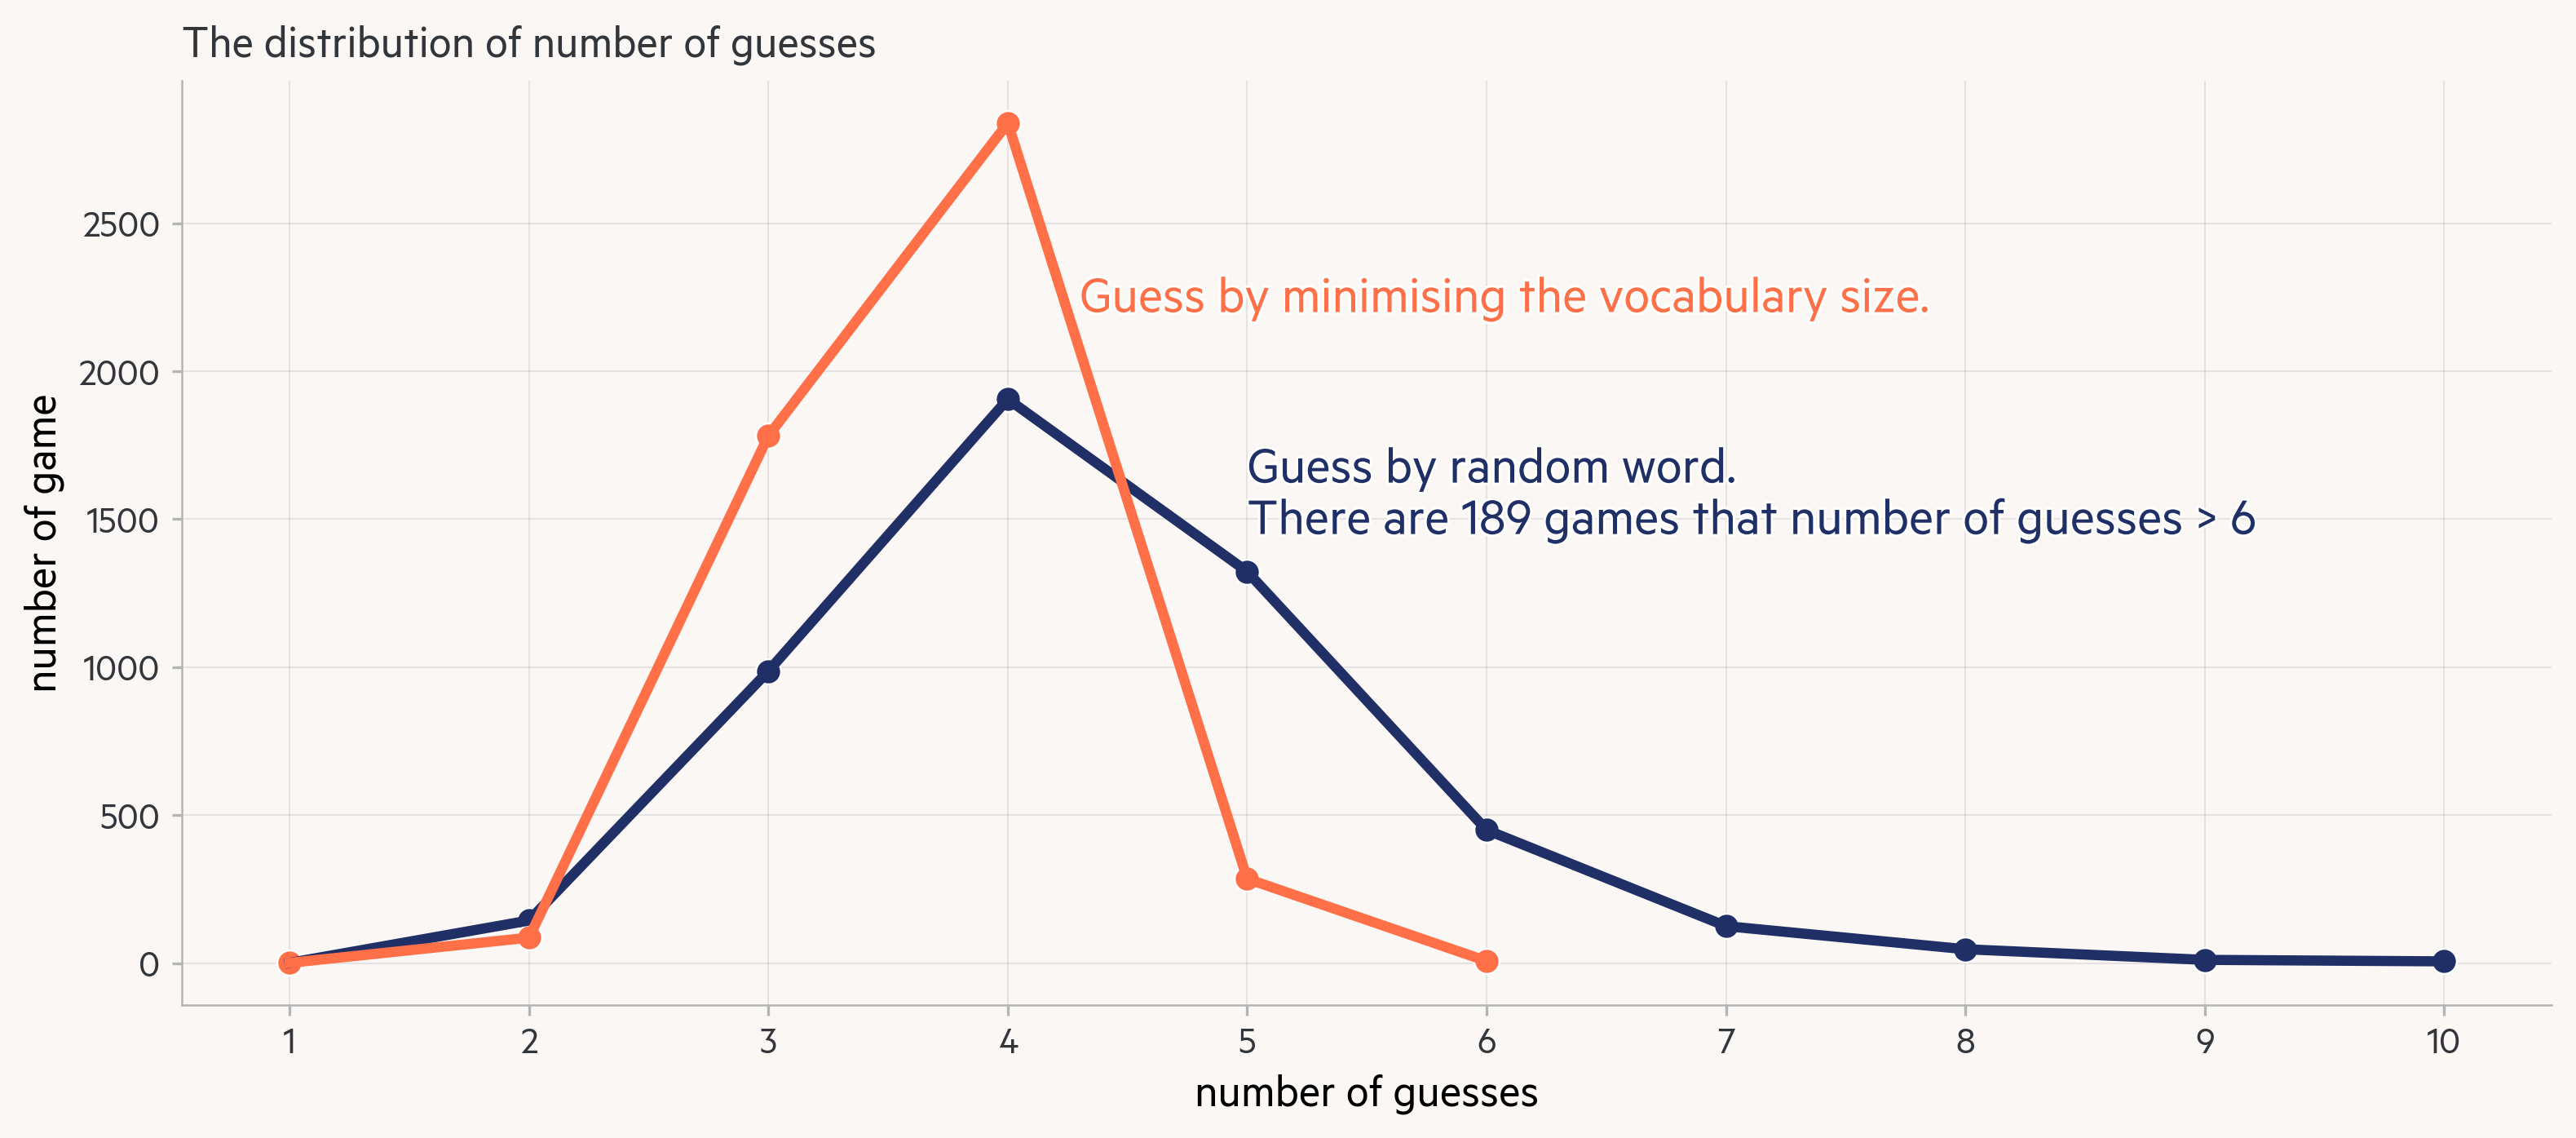

In [16]:
fig = plt.figure()


sns.scatterplot(data=df['random_guesses'].value_counts())
sns.lineplot(data=df['random_guesses'].value_counts(), linewidth=3)

sns.scatterplot(data=df['minimise_vocab_guesses'].value_counts())
sns.lineplot(data=df['minimise_vocab_guesses'].value_counts(), linewidth=3)

ff = "Metric"
fs = 16

text = f"Guess by minimising the vocabulary size."

plot_text_outlined(x=4.3, y=2200, s=text,
                   path_width=1.5,
                   color=_30k_main_palette_dict['orange'], fontfamily=ff, fontsize=fs)

text = f"Guess by random word.\nThere are {len(df[df['random_guesses'] > 6])} games that number of guesses > 6"

plot_text_outlined(x=5, y=1450, s=text,
                   path_width=1.5,
                   color=_30k_main_palette_dict['blue'], fontfamily=ff, fontsize=fs)

plt.title("The distribution of number of guesses", fontfamily=ff)
plt.xlabel("number of guesses", fontfamily=ff)
plt.ylabel("number of game", fontfamily=ff)

plt.xticks(np.arange(1, 11, 1), fontfamily=ff)
plt.yticks(np.arange(0, 3000, 500), fontfamily=ff)
plt.show()

In [5]:
len(df[df['random_guesses'] > 6])

189

In [8]:
np.mean(df['random_guesses'])

4.3198

In [9]:
np.mean(df['minimise_vocab_guesses'])

3.6684